In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('train(1).csv')

In [9]:
 
df.head()#first five rows

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [11]:
from sklearn.feature_selection import f_classif,mutual_info_classif,SelectPercentile
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import pickle

In [12]:
X = df.drop(columns=['target'])
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
df.head(2000001)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [15]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [16]:
df.drop('ID_code',axis=1,inplace=True)

<Axes: xlabel='target', ylabel='count'>

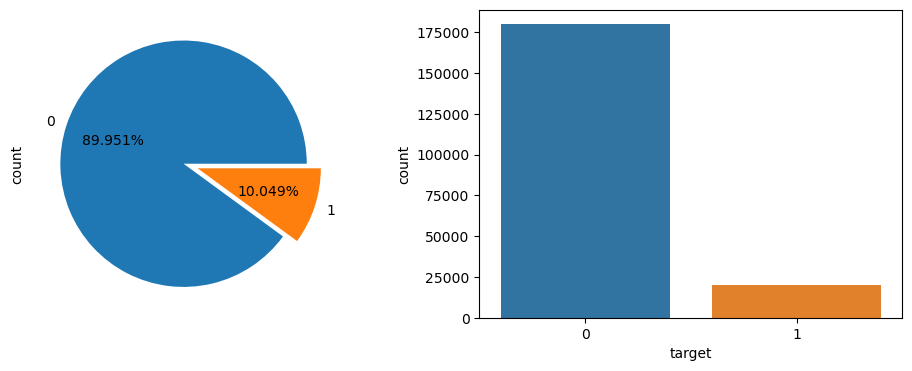

In [17]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df.target.value_counts().plot.pie(explode=[0, 0.12], autopct='%1.3f%%', ax=ax[0])
sns.countplot(x='target', data=df, ax=ax[1])


In [18]:

from imblearn.over_sampling import ADASYN

y = df.target
X = df.iloc[:,1:]
sampler = ADASYN(random_state=0)
overSamp_X,overSamp_y = sampler.fit_resample(X,y)
overSamp_y.value_counts(dropna=False)

target
1    187938
0    179902
Name: count, dtype: int64

In [19]:
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler

y = df['target']  # Select the target column
X = df.iloc[:, 1:]  # Select features (excluding the first column, assuming it's not part of the features)

sampler = RandomUnderSampler(random_state=0)  # Create the RandomUnderSampler object
underSamp_X, underSamp_y = sampler.fit_resample(X, y)  # Perform undersampling

underSamp_y.value_counts(dropna=False)  # Check the distribution of the


target
0    20098
1    20098
Name: count, dtype: int64

In [20]:

df = pd.concat([overSamp_X,overSamp_y],axis=1)
df = df.sample(frac=1,random_state=1) #To randomize the data
df.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
254549,12.801032,-0.234137,7.204692,6.488525,11.877978,-10.991217,5.109014,14.690664,-1.997388,8.097423,...,9.527156,2.000823,7.005444,18.052214,0.437979,11.948677,9.252721,11.386613,7.455510,1
339646,11.758228,-4.113063,13.852329,10.214027,11.924109,6.935680,6.641500,19.971275,4.919980,7.165361,...,9.659922,2.442496,-0.161721,19.290915,0.161389,-2.082418,9.443250,15.682495,8.300173,1
288990,16.130706,-3.969707,10.118114,6.724830,11.085619,-8.204975,4.955094,11.683073,3.069200,7.396528,...,3.416596,2.465079,3.906831,21.049500,0.848300,5.334066,9.337713,14.847017,-12.612345,1
251370,7.643475,0.806717,12.113520,8.647463,13.101162,-14.492049,4.634995,16.021046,-2.708482,6.355035,...,6.108591,3.600922,5.629327,16.715065,-1.495991,9.069211,8.864333,10.627334,-8.150509,1
262933,8.988784,0.348474,9.613160,5.020276,9.147571,0.195828,5.549134,20.847315,1.022663,8.533282,...,6.400665,0.936761,7.735676,18.273099,0.595127,2.635183,8.829247,16.942815,6.520807,1
35127,10.807000,1.198400,13.847800,4.758500,11.867500,-8.303400,6.104400,15.826800,4.673800,6.907600,...,13.882900,1.105500,6.318700,17.054400,-0.462600,4.695400,8.981300,11.655600,-1.198500,0
137367,7.628800,0.712200,7.624400,4.726600,11.515000,0.905500,6.491300,19.799100,2.295700,7.998000,...,4.771800,3.626700,8.424500,21.540600,-3.006400,0.424500,10.207500,15.816900,4.896900,0
202392,12.053214,-3.808164,14.912667,5.015039,11.344741,-16.684191,6.417626,11.207981,2.068909,6.361619,...,9.063199,3.234551,4.383339,21.191785,0.031064,-0.095146,8.723784,19.949944,3.853575,1
88981,9.231700,-0.024500,11.503100,3.790500,11.723000,-9.313600,5.765600,16.759300,1.328700,8.962100,...,9.276800,1.506000,4.709600,21.546100,1.067500,-5.171100,7.975100,11.881600,-22.600000,0
286456,11.706073,-0.845476,13.214649,7.430901,11.359308,-1.423411,6.008622,15.439566,-1.751960,6.152053,...,1.744418,1.451225,8.783622,17.160841,0.853086,9.563296,7.318500,11.869730,5.616239,1


In [21]:
F_stat,p_value = f_classif(df.drop('target',axis=1),df.target)
for col,stat,p in zip(df.drop('target',axis=1),F_stat,p_value):
    print(col,stat," : ",p)

var_0 2880.596646734631  :  0.0
var_1 2767.077349841928  :  0.0
var_2 3499.8344187527073  :  0.0
var_3 178.46681019146146  :  1.0707517604771611e-40
var_4 139.34463719900498  :  3.752671213780399e-32
var_5 950.8719785378613  :  1.585533998465283e-208
var_6 5422.082887703735  :  0.0
var_7 9.398230075857096  :  0.0021721074958717603
var_8 367.46714903370224  :  7.306785278062584e-82
var_9 1937.4087918065034  :  0.0
var_10 0.48171333119943244  :  0.48764770956572745
var_11 590.5321083427685  :  2.434103152564295e-130
var_12 5625.105055808305  :  0.0
var_13 3122.665512014799  :  0.0
var_14 52.45766452553203  :  4.404779383427984e-13
var_15 274.2333334721079  :  1.4277328222095105e-61
var_16 17.614090000414464  :  2.7063962320863778e-05
var_17 4.133763691408472  :  0.04203647854709667
var_18 1957.2266592880344  :  0.0
var_19 71.98924521853696  :  2.1715790108909987e-17
var_20 399.4011316578865  :  8.290633454965593e-89
var_21 3744.7963118813354  :  0.0
var_22 3843.5941515633813  :  0.0
var_

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and X_train contains categorical columns
y = df['target']  # Your target column
X = df.drop('target', axis=1)  # Drop the target column to get the features

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical

# Now, split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, max_depth=17, verbose=2)
model.fit(X_train, y_train)  # Train the model

# Check the scores
print(model.score(X_train, y_train))  # Training score
print(model.score(X_test, y_test))  # Test score


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 52.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9774834167029143
0.931723031752936


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.3s finished


In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.96      0.93     33316
           1       0.97      0.91      0.94     40252

    accuracy                           0.93     73568
   macro avg       0.93      0.93      0.93     73568
weighted avg       0.93      0.93      0.93     73568



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.7s finished
